<img src="./figures/logo_SU.png" style="height:100px">

# Méthodes approchées pour les vibrations transverses d'une poutre encastrée libre

Déterminer les pulsations propres et les modes propres de vibrations transverses de poutres complexes par la méthode de Rayleigh-Ritz.

Pour une poutre encastrée-libre, les fonctions de déplacement $g_0(x)$ et $g_1(x)$ ont pour expressions respectives : 

\begin{equation*}
		\begin{cases}
			g_0(x) = \left(\dfrac{x}{L}\right)^2, \\
			g_1(x) = \left(\dfrac{x}{L}\right)^3.
		\end{cases}
	\end{equation*}

<img src="./figures/Poutre_EL.png" style="height:150px">

La méthodologie à employer est celle présentée en cours :
    
* Calculer l'énergie potentielle
* Calculer l'énergie cinétique
* Construire les matrices masse et raideur
* Calculer les pulsations propres
* Calculer les modes propres

In [10]:
from sympy import *
from sympy.interactive.printing import init_printing

init_printing(use_unicode=False, wrap_line=False, no_global=True)

import sympy as sym
import numpy as np

from numpy import linalg as LA
%matplotlib inline
import pylab as plt

# ----------------------------------------------------------------------

x, E, S, k, S, m, CL, S0, Iz, CT = sym.symbols('x E S k S m CL S0 Iz CT')

L = sym.symbols('L',positive=True)

phi = sym.Symbol('phi')
phi1 = sym.Symbol('phi_1')
phi2 = sym.Symbol('phi_2')
phi3 = sym.Symbol('phi_3')

vphi = sym.Symbol('\dot{\phi}')
vphi1 = sym.Symbol('\dot{\phi_1}')
vphi2 = sym.Symbol('\dot{\phi_2}')
vphi3 = sym.Symbol('\dot{\phi_3}')

rho = sym.Symbol('rho')
omg = sym.Symbol('omega')
beta = sym.Symbol('beta')

#### On définit le déplacement par l'expression :
\begin{equation*}
	v(x,t) \simeq \left(\dfrac{x}{L}\right)^2 \phi_1(t) + \left(\dfrac{x}{L}\right)^3 \phi_2(t),
\end{equation*}

Text(0.5, 0, 'x/L')

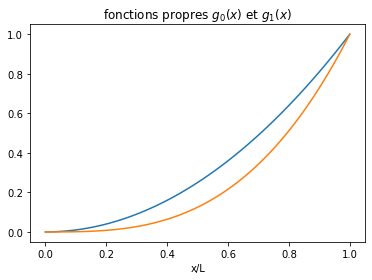

In [11]:
# Visualisation des fonctions de forme

LL = 1
xx = np.linspace(0, LL, 100)

g0 = (xx / LL)**2
g1 = (xx / LL)**3

plt.figure()
plt.plot(xx, g0)
plt.plot(xx, g1)

plt.title("fonctions propres $g_0(x)$ et $g_1(x)$")
plt.xlabel("x/L")

In [12]:
def v(x):
    return (x/L)**2*phi1+(x/L)**3*phi2

### Calcul de l'énergie de déformation $U$ et de l'énergie cinétique $T$

L'énergie de déformation $U$ est la déformation de la poutre $U_{poutre}$. 

$$\quad U_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L EI \left(\dfrac{\partial^2 v}{\partial x^2}\right)^2 dx \quad$$

Upoutre =


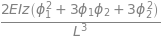

In [13]:
Upoutre = sym.simplify(Rational(1,2)*integrate(E*Iz*(diff(v(x), x, x))**2, (x, 0, L)));

print('Upoutre =') 
Upoutre

L'énergie cinétique $T$ du système est égale à l'énergie cinétique de la poutre $T_{poutre}$ :
$$\quad T_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L \rho S \left(\dfrac{\partial^2 v}{\partial t^2}\right)^2 dx \quad$$

In [15]:
def vvt(x):
    return ((x/L)**2)*vphi1 + ((x/L)**3)*vphi2;

Tpoutre = sym.simplify(Rational(1,2)*integrate(rho*S*(vvt(x))**2, (x, 0, L)));

print("Tpoutre =");
Tpoutre

Tpoutre =


### Construction des matrices masse et raideur

In [17]:
# Construction de la matrice de raideur K

U = Upoutre
K = sym.Matrix([[diff(U, phi1, phi1), diff(U, phi1, phi2)], [diff(U, phi2, phi1), diff(U, phi2, phi2)]])

print("Matrice raideur :");
K

Matrice raideur :


[4*E*Iz  6*E*Iz ]
[------  ------ ]
[   3       3   ]
[  L       L    ]
[               ]
[6*E*Iz  12*E*Iz]
[------  -------]
[   3        3  ]
[  L        L   ]

In [18]:
# Construction de la matrice de masse M

T = Tpoutre
M = sym.Matrix([[diff(T, vphi1, vphi1), diff(T, vphi1, vphi2)], [diff(T, vphi2, vphi1), diff(T, vphi2, vphi2)]])

print("Matrice masse :");
M

Matrice masse :


[L*S*rho  L*S*rho]
[-------  -------]
[   5        6   ]
[                ]
[L*S*rho  L*S*rho]
[-------  -------]
[   6        7   ]

### Les pulsations propres sont les solutions de $det(K-\omega^2 M)=0$ :

In [20]:
A = K - omg**2 * M

print('On calcule le déterminant de la matrice suivante :')
A

On calcule le déterminant de la matrice suivante :


[                  2                        2     ]
[4*E*Iz   L*S*omega *rho  6*E*Iz   L*S*omega *rho ]
[------ - --------------  ------ - -------------- ]
[   3           5            3           6        ]
[  L                        L                     ]
[                                                 ]
[                  2                         2    ]
[6*E*Iz   L*S*omega *rho  12*E*Iz   L*S*omega *rho]
[------ - --------------  ------- - --------------]
[   3           6             3           7       ]
[  L                         L                    ]

On peut simplifier cette matrice en introduisant le paramètre $\beta = \dfrac{L^2}{C_T} \omega$ avec $C_L=\sqrt{\dfrac{E I}{\rho S}}$ la vitesse des ondes transverses

In [21]:
Amodif = simplify((K - (E*Iz*beta**2)/(rho*S*L**4)*M))*L**3/E/Iz #omg**2 = (E*Iz*beta**2)/(rho*S*L**4)=> omega=beta*CT/L^2
Amodif

[        2          2 ]
[    beta       beta  ]
[4 - -----  6 - ----- ]
[      5          6   ]
[                     ]
[        2           2]
[    beta        beta ]
[6 - -----  12 - -----]
[      6           7  ]

In [23]:
detAmodif = Amodif.det()

beta2=sym.solve(detAmodif, beta**2)
beta2

In [25]:
# Recherche des pulsations propres

print('omega_1 =', sqrt(beta2[0]).evalf()*CT/L**2)
print(' ')
print('omega_2 =', sqrt(beta2[1]).evalf()*CT/L**2) 

omega_1 = 3.53273154283676*CT/L**2
 
omega_2 = 34.8068931082084*CT/L**2


In [28]:
# Recherche des modes propres associés

vec_propres = Amodif.eigenvects();

print('X1 = ')
X1 = sym.simplify((vec_propres[0][2][0]).subs(beta,sqrt(beta2[0])).evalf())
pprint(X1)

print(' ')

print('X2 = ')
X2 = sym.simplify((vec_propres[1][2][0]).subs(beta,sqrt(beta2[1])).evalf())
pprint(X2)

# Verification modes propres
# pprint(Amodif.subs(beta,sqrt(beta2[0])).evalf()*X1)
# pprint(Amodif.subs(beta,sqrt(beta2[1])).evalf()*X2)

X1 = 
⎡-2.60642828548549⎤
⎢                 ⎥
⎣       1.0       ⎦
 
X2 = 
⎡-0.822143143085943⎤
⎢                  ⎥
⎣       1.0        ⎦
⎡-4.44089209850063e-16⎤
⎢                     ⎥
⎣          0          ⎦
⎡2.8421709430404e-14⎤
⎢                   ⎥
⎣         0         ⎦


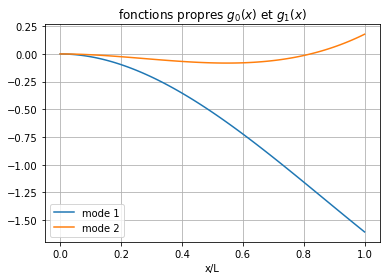

In [29]:
# Figure

plt.figure()

plt.plot(xx, X1[0]*g0 + X1[1]*g1, label='mode 1')
plt.plot(xx, X2[0]*g0 + X2[1]*g1, label='mode 2')

plt.title("fonctions propres $g_0(x)$ et $g_1(x)$")
plt.xlabel("x/L")

plt.legend()
plt.grid('True')

#### La poutre est maintenant encastrée en $x=0$ et l'autre extrémité est liée à un support de masse $m$ et de raideur $k$. En utilisant les mêmes fonctions de déplacement que pour la poutre encastrée-libre et en notant $\phi_3(t)$ le déplacement de la masse, déterminer les trois premières pulsations propres et les modes correspondants. On étudiera le cas particulier où $k = EI/L^3$ et $m = \rho SL/7$.

<img src="./figures/Poutre_F1.png" style="height:150px">

L'énergie cinétique $T$ est la somme de l'énergie cinétique $T_{poutre}$ de la poutre et de celle $T_{masse}$ de la masse $m$ avec 


$$\quad T_{masse} = \dfrac{1}{2} m \left(\dfrac{\partial v_{masse}}{\partial t}\right)^2 = \dfrac{1}{2} m \dot{\phi_3}^2(t)$$

Donc l'énergie cinétique $T$ pour $m = \rho SL/7$ a pour expression :

In [ ]:
T = Tpoutre + Tmasse(rho*S*L/7)

print('T =') 
T

In [30]:
# Construction de la matrice de masse M

M = sym.Matrix([[diff(T, vphi1, vphi1), diff(T, vphi1, vphi2), diff(T, vphi1, vphi3)], [diff(T, vphi2, vphi1), diff(T, vphi2, vphi2), diff(T, vphi1, vphi3)], [diff(T, vphi3, vphi1), diff(T, vphi3, vphi2), diff(T, vphi3, vphi3)]])

print("Matrice masse :");
M

Matrice masse :


[L*S*rho  L*S*rho   ]
[-------  -------  0]
[   5        6      ]
[                   ]
[L*S*rho  L*S*rho   ]
[-------  -------  0]
[   6        7      ]
[                   ]
[   0        0     0]

L'énergie de déformation $U$ est la somme de l'énergie de déformation de la poutre $U_{poutre}$ et de celle $U_{ressort}$ du ressort de raideur $k$ avec 

$\quad U_{ressort} = ...$.

In [ ]:
def Uressort(k):
    return sym.simplify();

print('Uressort =') 
Uressort(k)

Donc l'énergie de déformation $U$ pour $k = EI/L^3$ a pour expression :

In [ ]:
# Construction de la matrice de raideur K
U=Upoutre+Uressort(E*Iz/L**3)
K = sym.Matrix([[diff(U,phi1,phi1),diff(U,phi1,phi2),diff(U,phi1,phi3)],[diff(U,phi2,phi1),diff(U,phi2,phi2),diff(U,phi1,phi3)],[diff(U,phi3,phi1),diff(U,phi3,phi2),diff(U,phi3,phi3)]])
print("Matrice raideur :");
K

### Les pulsations propres sont les solutions de $det(K-\omega^2 M)=0$ :


In [ ]:
A = K - omg**2 * M
print('On calcule le déterminant de la matrice suivante :')
A

In [ ]:
Amodif = simplify((K - (E*Iz*beta**2)/(rho*S*L**4)*M))*L**3/E/Iz #omg**2 = (E*Iz*beta**2)/(rho*S*L**4)=> omega=beta*CT/L^2
Amodif

In [ ]:
detAmodif = Amodif.det().evalf()
detAmodif
beta2=sym.solve(detAmodif,beta**2)
beta2

In [ ]:
#Recherche des pulsations propres
print('omega_1 =',sqrt(abs(beta2[0]))*CT/L**2)
print(' ')
print('omega_2 =',sqrt(abs(beta2[1]))*CT/L**2) 
print(' ')
print('omega_3 =',sqrt(abs(beta2[2]))*CT/L**2) 